In [38]:
import pandas as pd
import numpy as np
from data_storage import create_connection
import matplotlib.pyplot as plt

In [39]:
connection = create_connection("../database/crypto_billionairs.db")

In [153]:
sql = 'SELECT table_name'\
        ', annualized_return as annualized_return'\
        ', annualized_return / trades_count AS ann_return_per_trade'\
        ', win_rate AS win_rate'\
        ', sharpe_ratio_annualized as sharpe_ratio'\
        ', sortino_ratio_annualized as sortino_ratio'\
        ', maximum_drawdown as maximum_drawdown'\
        ', calmar_ratio_annualized as calmar_ratio'\
        ' FROM cryptocurrencies_risk_metrics_1m_abnormal_day_ml_threshold'\
        ' where timehorizon >= 365 and table_name not like "%ONT%"'
       

df = pd.read_sql_query(f"{sql}", connection)
df.head()

,table_name,annualized_return,ann_return_per_trade,win_rate,sharpe_ratio,sortino_ratio,maximum_drawdown,calmar_ratio
0,no_0_threshold_ensemble_long_ADA_1,7174.974501,30.402434,72.033898,4813.702160,1665.413880,-0.049828,14535.864539
1,no_0_threshold_ensemble_long_BCH_1,45.442792,0.134845,59.050445,75.187950,23.994951,-0.194913,57.918684
2,no_0_threshold_ensemble_long_BSV_1,1242.517894,5.402252,55.652174,363.550064,261.743002,0.000000,0.000000
3,no_0_threshold_ensemble_long_BTC_1,9.962253,0.012453,61.750000,0.087639,11.757373,-0.126045,44.375749
4,no_0_threshold_ensemble_long_BTG_1,293.466200,0.764235,60.677083,154.118681,162.709603,-0.261375,289.140340


In [154]:
df["threshold"] = df["table_name"].str.split("_").str[1].astype(int)
df["type"] = df["table_name"].str.split("_").str[4]
df = df.drop(["table_name"], axis = 1)

In [155]:
df_plt = df.groupby(by=["type", "threshold"]).mean()

In [169]:
df_plt.xs("short")

,annualized_return,ann_return_per_trade,win_rate,sharpe_ratio,sortino_ratio,maximum_drawdown,calmar_ratio
threshold,,,,,,,
0,68.232005,0.106773,58.292234,61.318331,15.038398,-0.612236,28.645096
1,145.407622,0.728538,66.097886,96.443518,28.922279,-0.397756,3652.894399
2,176.869324,0.998191,67.328539,119.649752,35.885335,-0.348093,4336.971403
3,606.722828,5.262859,67.795532,133.208884,43.191539,-0.312725,4429.730231
4,644.025266,5.673447,67.642257,150.706227,46.749718,-0.263488,4532.808976
5,704.525234,6.331523,67.908226,153.583863,48.525416,-0.263488,4771.348928
6,624.031014,5.659910,68.197416,148.095504,46.724840,-0.231280,5451.220791
7,680.721647,6.306851,68.762537,159.355596,50.393640,-0.231227,306.529382
8,671.264239,6.300158,68.931876,153.783972,49.111495,-0.231227,291.763423


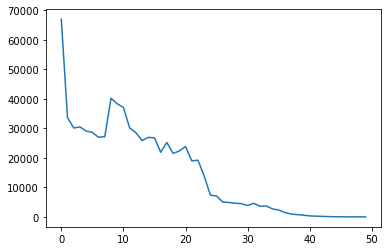

In [164]:
plt.plot(df_plt.xs("long")["annualized_return"])
plt.show()

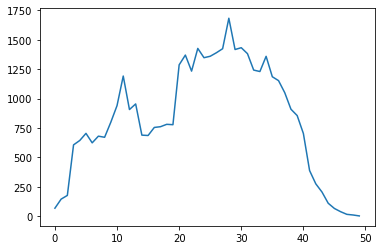

In [165]:
plt.plot(df_plt.xs("short")["annualized_return"])
plt.show()

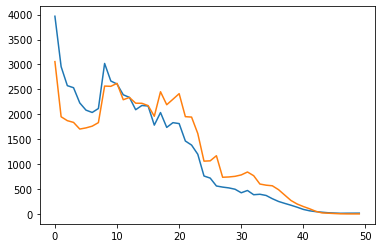

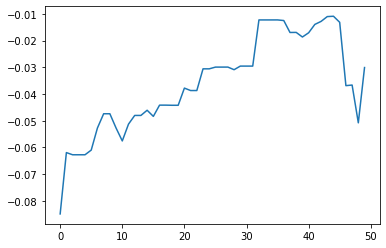

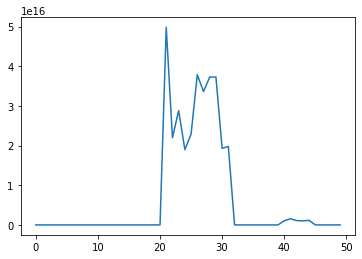

In [166]:
plt.plot(df_plt.xs("long")["sharpe_ratio"])
plt.plot(df_plt.xs("long")["sortino_ratio"])
plt.show()
plt.plot(df_plt.xs("long")["maximum_drawdown"])
plt.show()
plt.plot(df_plt.xs("long")["calmar_ratio"])
plt.show()

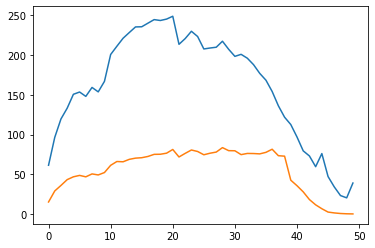

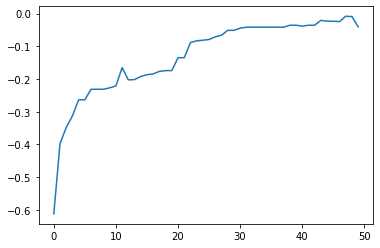

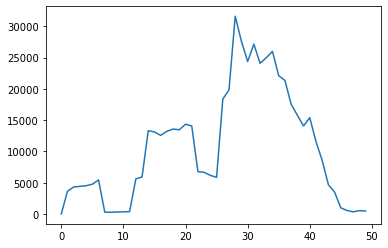

In [167]:
plt.plot(df_plt.xs("short")["sharpe_ratio"])
plt.plot(df_plt.xs("short")["sortino_ratio"])
plt.show()
plt.plot(df_plt.xs("short")["maximum_drawdown"])
plt.show()
plt.plot(df_plt.xs("short")["calmar_ratio"])
plt.show()

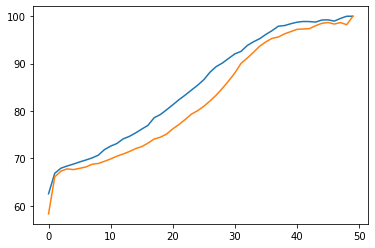

In [168]:
plt.plot(df_plt.xs("long")["win_rate"])
plt.plot(df_plt.xs("short")["win_rate"])
plt.show()